# Import Libraries

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Load Dataset

In [6]:
image_size = (640, 480)
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1.0/255.0,
                                   validation_split=0.2)

train_generator = train_datagen.flow_from_directory('dataset',
                                                    target_size=image_size,
                                                    batch_size=batch_size,
                                                    class_mode='binary',
                                                    subset='training')

validation_generator = train_datagen.flow_from_directory('dataset',
                                                         target_size=image_size,
                                                         batch_size=batch_size,
                                                         class_mode='binary',
                                                         subset='validation')

Found 1026 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


# Build and Train CNN Model

In [7]:
cnn_model = models.Sequential()

cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(640, 480, 3)))
cnn_model.add(layers.MaxPooling2D((2, 2)))

cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))

cnn_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))

cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(128, activation='relu'))
cnn_model.add(layers.Dense(1, activation='sigmoid'))

## Compile the Model

In [8]:
cnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

## Train the CNN Model

In [ ]:
cnn_history = cnn_model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10


# Build & Train AlexNet Model

In [20]:
# # Import necessary libraries (if not already imported)
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# from tensorflow.keras.optimizers import Adam

# Define the AlexNet model
alexnet_model = Sequential()

# Layer 1
alexnet_model.add(Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=(227, 227, 3)))
alexnet_model.add(MaxPooling2D((3, 3), strides=(2, 2)))

# Layer 2
alexnet_model.add(Conv2D(256, (5, 5), activation='relu'))
alexnet_model.add(MaxPooling2D((3, 3), strides=(2, 2)))

# Layer 3
alexnet_model.add(Conv2D(384, (3, 3), activation='relu'))

# Layer 4
alexnet_model.add(Conv2D(384, (3, 3), activation='relu'))

# Layer 5
alexnet_model.add(Conv2D(256, (3, 3), activation='relu'))
alexnet_model.add(MaxPooling2D((3, 3), strides=(2, 2)))

# Fully connected layers
alexnet_model.add(Flatten())
alexnet_model.add(Dense(4096, activation='relu'))
alexnet_model.add(Dropout(0.5))  # Optional: Dropout layer for regularization
alexnet_model.add(Dense(4096, activation='relu'))
alexnet_model.add(Dropout(0.5))  # Optional: Dropout layer for regularization
alexnet_model.add(Dense(1, activation='sigmoid'))

# Compile the model
alexnet_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the AlexNet model
alexnet_history = alexnet_model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10


InvalidArgumentError: Graph execution error:

Detected at node sequential_2/dense_5/Relu defined at (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 197, in _run_module_as_main

  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 87, in _run_code

  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance

  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 712, in start

  File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start

  File "C:\ProgramData\Anaconda3\lib\asyncio\base_events.py", line 601, in run_forever

  File "C:\ProgramData\Anaconda3\lib\asyncio\base_events.py", line 1905, in _run_once

  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 80, in _run

  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue

  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one

  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell

  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request

  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 390, in do_execute

  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell

  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2914, in run_cell

  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2960, in _run_cell

  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 78, in _pseudo_sync_runner

  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3185, in run_cell_async

  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3377, in run_ast_nodes

  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code

  File "C:\Users\sujit\AppData\Local\Temp\ipykernel_7432\515737350.py", line 40, in <module>

  File "C:\Users\sujit\AppData\Roaming\Python\Python39\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\sujit\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py", line 1783, in fit

  File "C:\Users\sujit\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py", line 1377, in train_function

  File "C:\Users\sujit\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py", line 1360, in step_function

  File "C:\Users\sujit\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py", line 1349, in run_step

  File "C:\Users\sujit\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py", line 1126, in train_step

  File "C:\Users\sujit\AppData\Roaming\Python\Python39\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\sujit\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py", line 589, in __call__

  File "C:\Users\sujit\AppData\Roaming\Python\Python39\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\sujit\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "C:\Users\sujit\AppData\Roaming\Python\Python39\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "C:\Users\sujit\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\sequential.py", line 398, in call

  File "C:\Users\sujit\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\functional.py", line 515, in call

  File "C:\Users\sujit\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\functional.py", line 672, in _run_internal_graph

  File "C:\Users\sujit\AppData\Roaming\Python\Python39\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\sujit\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "C:\Users\sujit\AppData\Roaming\Python\Python39\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "C:\Users\sujit\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\core\dense.py", line 255, in call

  File "C:\Users\sujit\AppData\Roaming\Python\Python39\site-packages\keras\src\activations.py", line 306, in relu

  File "C:\Users\sujit\AppData\Roaming\Python\Python39\site-packages\keras\src\backend.py", line 5397, in relu

Matrix size-incompatible: In[0]: [16,32256], In[1]: [1024,4096]
	 [[{{node sequential_2/dense_5/Relu}}]] [Op:__inference_train_function_7557]

# Confusion Matrix

## (a) For CNN

In [8]:
cnn_predictions = cnn_model.predict(validation_generator)
cnn_y_pred = [1 if pred > 0.5 else 0 for pred in cnn_predictions]
cnn_y_true = validation_generator.classes

cnn_confusion = confusion_matrix(cnn_y_true, cnn_y_pred)
print(cnn_confusion)

1/1 [==============================] - 1s 807ms/step
[[2 0]
 [0 2]]


## (b) For AlexNet

In [10]:
# Generate predictions using the AlexNet model
alexnet_predictions = alexnet_model.predict(validation_generator)
alexnet_y_pred = [1 if pred > 0.5 else 0 for pred in alexnet_predictions]
alexnet_y_true = validation_generator.classes

# Create the confusion matrix for the AlexNet model
from sklearn.metrics import confusion_matrix
alexnet_confusion = confusion_matrix(alexnet_y_true, alexnet_y_pred)

print(alexnet_confusion)

1/1 [==============================] - 1s 664ms/step
[[0 2]
 [1 1]]


# Plot Confusion Matrix

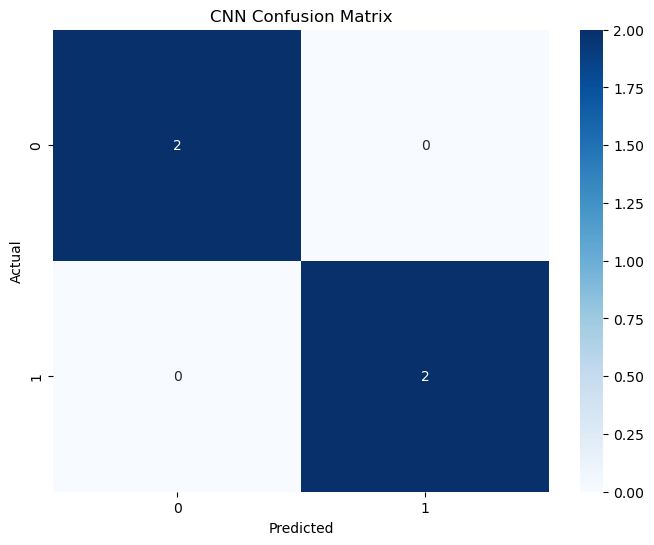

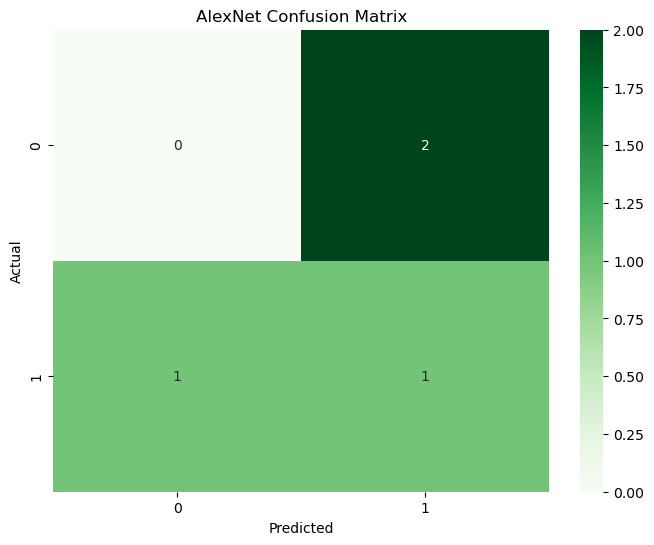

In [18]:
# Define the confusion matrices
cnn_confusion = [[2, 0], [0, 2]]
alexnet_confusion = [[0, 2], [1, 1]]

# Plot the CNN confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cnn_confusion, annot=True, fmt="d", cmap="Blues")
plt.title("CNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot the AlexNet confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(alexnet_confusion, annot=True, fmt="d", cmap="Greens")
plt.title("AlexNet Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot the training and validation accuracy and loss

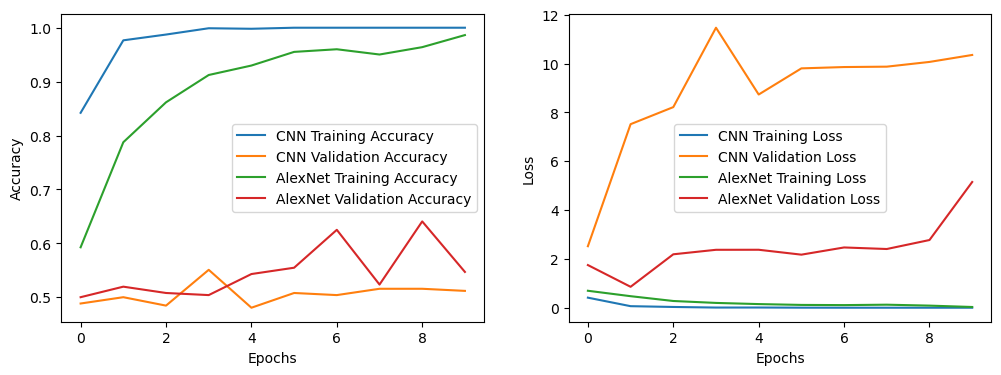

In [36]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['accuracy'], label='CNN Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='CNN Validation Accuracy')
plt.plot(alexnet_history.history['accuracy'], label='AlexNet Training Accuracy')
plt.plot(alexnet_history.history['val_accuracy'], label='AlexNet Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['loss'], label='CNN Training Loss')
plt.plot(cnn_history.history['val_loss'], label='CNN Validation Loss')
plt.plot(alexnet_history.history['loss'], label='AlexNet Training Loss')
plt.plot(alexnet_history.history['val_loss'], label='AlexNet Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
cnn_tp, cnn_tn, cnn_fp, cnn_fn = cnn_confusion[1][1], cnn_confusion[0][0], cnn_confusion[0][1], cnn_confusion[1][0]
cnn_accuracy = (cnn_tp + cnn_tn) / (cnn_tp + cnn_tn + cnn_fp + cnn_fn)
print(f'CNN Accuracy: {cnn_accuracy:.2f}')

CNN Accuracy: 1.00


In [19]:
alexnet_tp, alexnet_tn, alexnet_fp, alexnet_fn = alexnet_confusion[1][1], alexnet_confusion[0][0], alexnet_confusion[0][1], alexnet_confusion[1][0]
alexnet_accuracy = (alexnet_tp + alexnet_tn) / (alexnet_tp + alexnet_tn + alexnet_fp + alexnet_fn)
print(f'AlexNet Accuracy: {alexnet_accuracy:.2f}')

AlexNet Accuracy: 0.25
